<a href="https://colab.research.google.com/github/ArminD93/WorldHappinessReport/blob/dev_Report2019/WorldHappinessReport_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Import zeszytu z ustawieniami:
%cd '/content/drive/My Drive/ColabNotebooks/WorldHappiness/'
%run WorldHappinessReport_configuration.ipynb


happiness2019 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2019.csv', low_memory=False)

DistributionObj = Distribution(happiness2019)
CorrelationObj = Correlation(dataset=happiness2019)


happiness2019.head()

/content/drive/My Drive/ColabNotebooks/WorldHappiness


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [2]:
happiness2019.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 19.8 KB


In [3]:
happiness2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


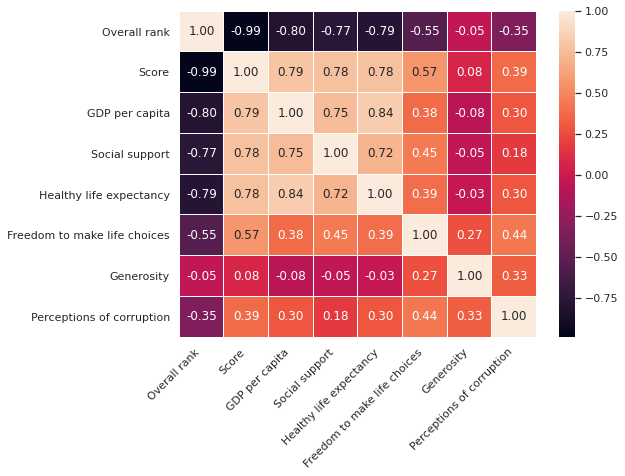

In [4]:
CorrelationObj.addCorrelationmap

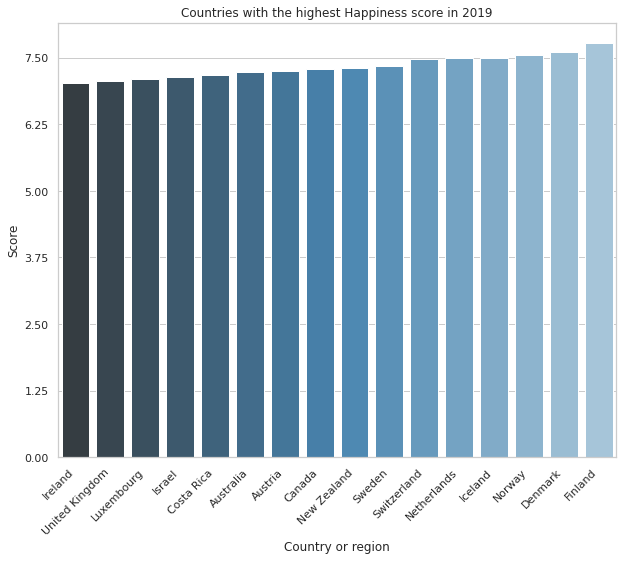

In [5]:
# Countries with the highest Happiness score in 2019
Sortedhappiness2019 = happiness2019.sort_values(by='Score')
Sortedhappiness2019Greaterthan7 = Sortedhappiness2019['Score'] >= 7
Sortedhappiness2019Greaterthan7 = Sortedhappiness2019[Sortedhappiness2019Greaterthan7]

x_data= 'Country or region'

sns.set_style('whitegrid') 
plt.figure(figsize=(10,8))
plt.yticks(np.arange(0, 14, step=1.25))

g = sns.barplot(  data=Sortedhappiness2019Greaterthan7, x=x_data,  y='Score',palette='Blues_d'  )

g.set( xlabel='Country or region', ylabel='Score', title='Countries with the highest Happiness score in 2019')
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
plt.show()

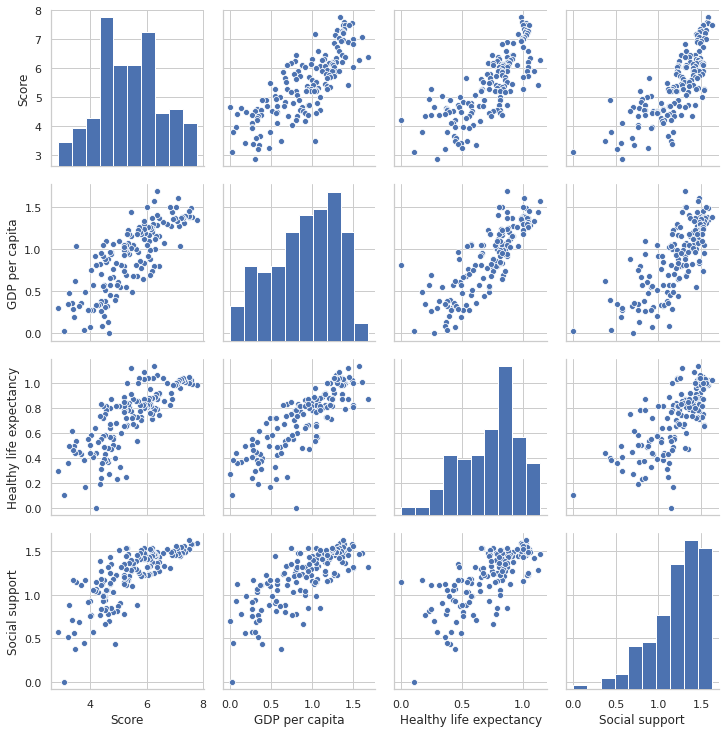

In [6]:
colNames = ['Score', 'GDP per capita', 'Healthy life expectancy', 'Social support']
sns.pairplot(happiness2019[colNames])
plt.show()

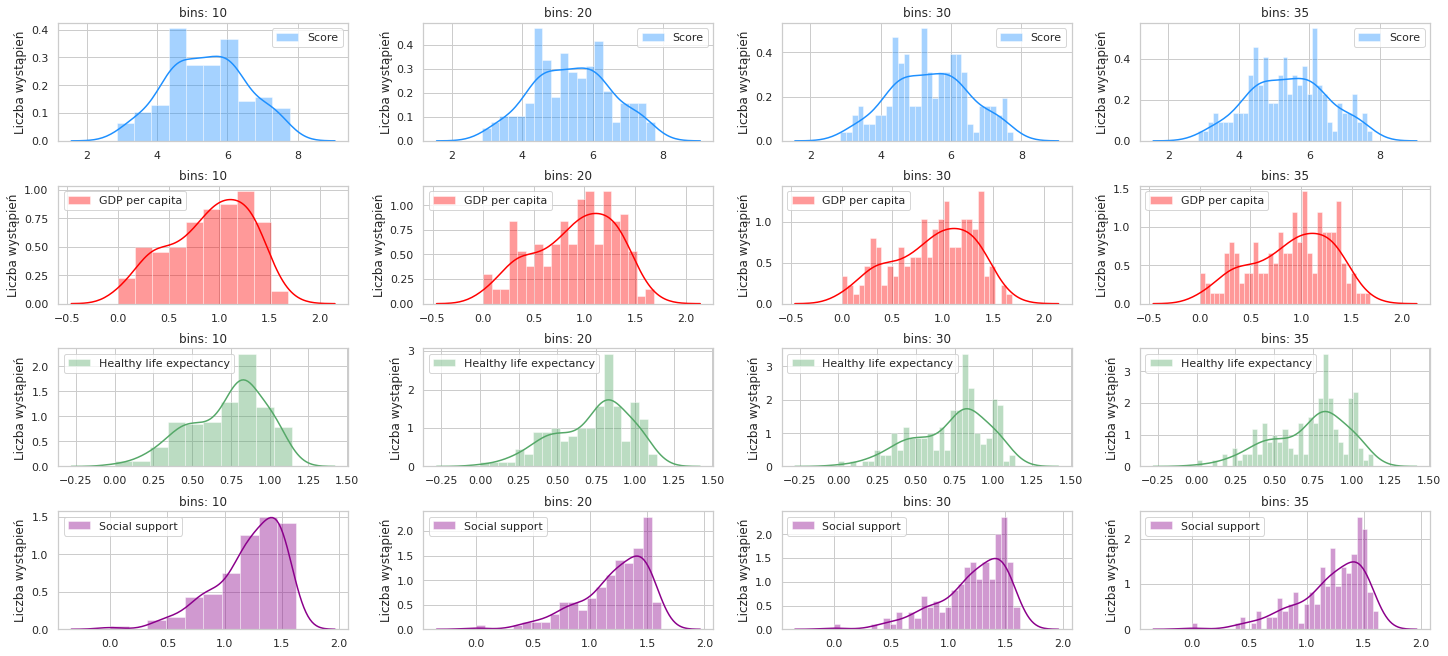

In [7]:
binsValues = [10,20,30,35]
DistributionObj.addHist_with_variety_values_of_bins(value=colNames, bins=binsValues, set_width=20,  set_height=9)

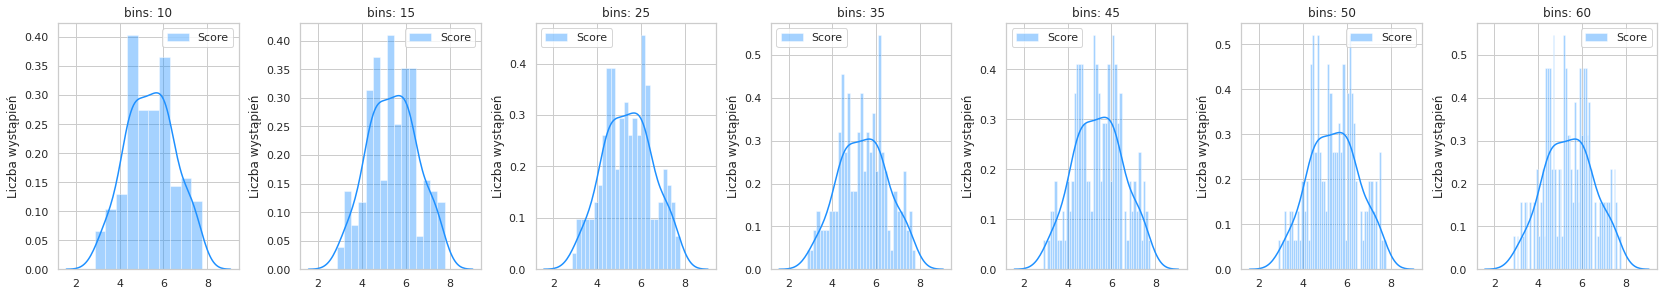

In [8]:
binsValues = [10, 15, 25, 35, 45, 50, 60]
DistributionObj.addHist_with_variety_values_of_bins(value=colNames[0], bins=binsValues, set_width=23, set_height=4)

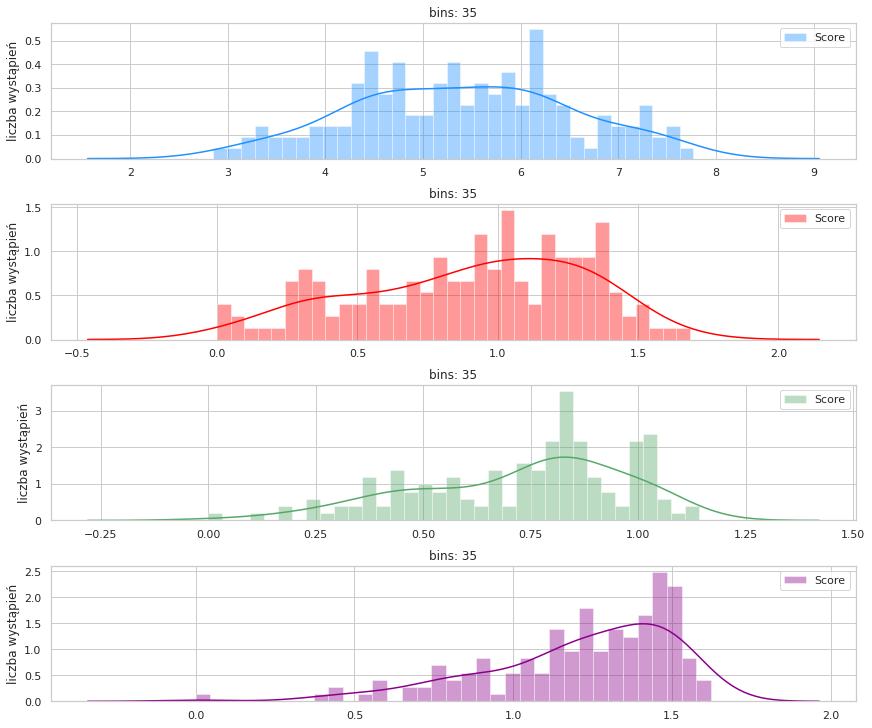

In [9]:
DistributionObj.addHist(value=colNames, bins=35, set_height=10, set_width=12)

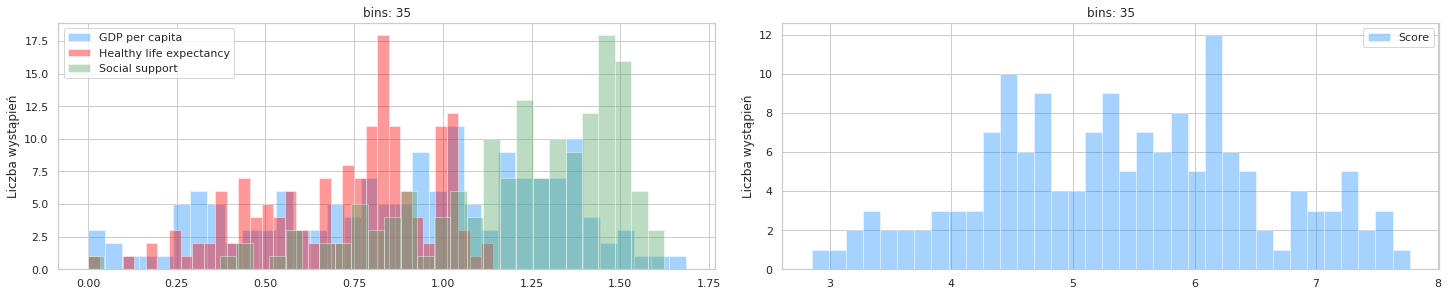

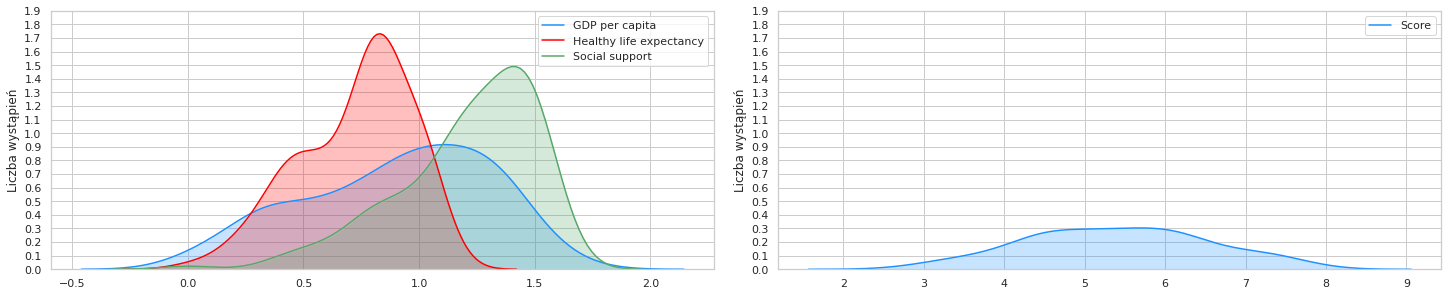

In [10]:
DistributionObj.addStackedHist(list= colNames, bins=35, set_width=20, set_height=4)
DistributionObj.addDensityDistribution(value=colNames, set_width=20, set_height=4)

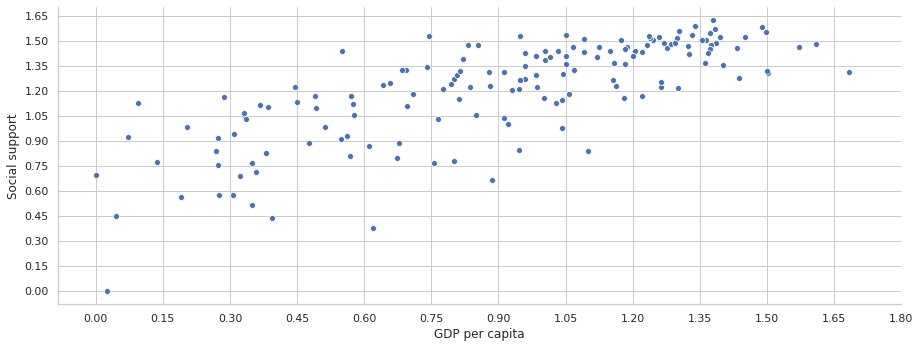

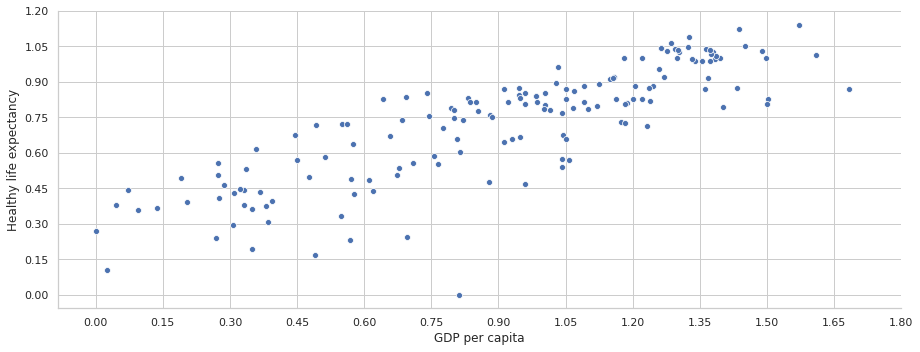

In [11]:
CorrelationObj.addScatterPlot(y_data='Social support', x_data='GDP per capita', xstep=0.15, ystep=0.15, width=15, height=5)
CorrelationObj.addScatterPlot(y_data='Healthy life expectancy', x_data='GDP per capita', xstep=0.15, ystep=0.15, width=15, height=5)

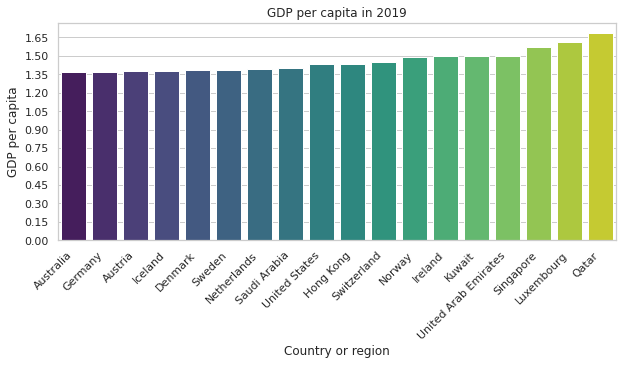

In [12]:
GDPperCapita_greaterThan1dota37 = happiness2019['GDP per capita'] >= 1.37

GDOP_data = happiness2019[GDPperCapita_greaterThan1dota37].sort_values(by='GDP per capita')

sns.set_style('whitegrid') 
plt.figure(figsize=(10,4))
plt.yticks(np.arange(0, 2.15, step=0.15))

g = sns.barplot(  data=GDOP_data, x='Country or region',  y='GDP per capita',palette='viridis'  )

g.set( xlabel='Country or region', ylabel='GDP per capita', title='GDP per capita in 2019')
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
plt.show()

In [13]:
happiness2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


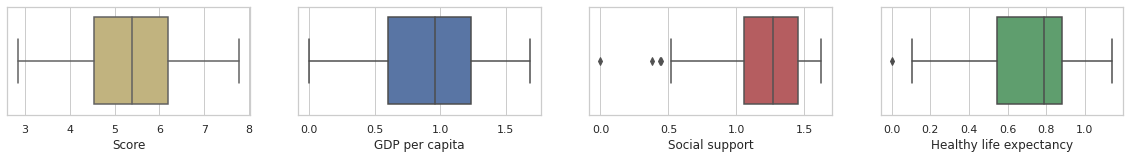

In [14]:
fig, axes = plt.subplots(1,4, figsize=(20,2))

sns.boxplot(  x="Score", data=happiness2019, ax=axes[0], color='y')
sns.boxplot(  x="GDP per capita", data=happiness2019, ax=axes[1], color='b')
sns.boxplot(  x="Social support", data=happiness2019, ax=axes[2], color='r')
sns.boxplot(  x="Healthy life expectancy", data=happiness2019, ax=axes[3], color='g')
plt.show()

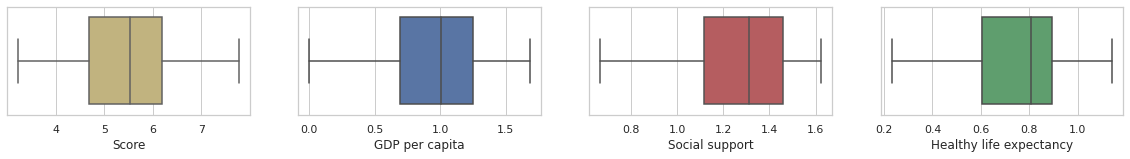

In [15]:
colNames = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy']

# wyznaczamy dolną część pudełka (lewa część)
Q1 = happiness2019[colNames].quantile(0.25)

# wyznaczamy górną część pudełka (prawa część)
Q3 =  happiness2019[colNames].quantile(0.75)

# IQR - rozstęp kwartylowy
IQR = Q3 - Q1

outlier_condit =  ((happiness2019[colNames] < (Q1 - IQR)) | (happiness2019[colNames] > (Q3 + IQR)) ) 

happiness2019_iqr = happiness2019[colNames][~outlier_condit.any(axis=1)]

fig, axes = plt.subplots(1,4, figsize=(20,2))

sns.boxplot(  x="Score", data=happiness2019_iqr, ax=axes[0], color='y')
sns.boxplot(  x="GDP per capita", data=happiness2019_iqr, ax=axes[1], color='b')
sns.boxplot(  x="Social support", data=happiness2019_iqr, ax=axes[2], color='r')
sns.boxplot(  x="Healthy life expectancy", data=happiness2019_iqr, ax=axes[3], color='g')
plt.show()

In [0]:
X = happiness2019[['GDP per capita', 'Social support', 'Healthy life expectancy']].values
y = happiness2019['Score'].values.reshape(-1,1)

X_iqr = happiness2019_iqr[['GDP per capita', 'Healthy life expectancy', 'Social support']].values
y_iqr = happiness2019_iqr['Score'].values.reshape(-1,1)
                
# Przeskaluję dane
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler_iqr = StandardScaler()
scaler_iqr.fit(X_iqr)
X_iqr = scaler.transform(X_iqr)

In [17]:
metric_cols =[('SCORES', 'SCORE[%]'), ('SCORES', 'SCORE(IQR)[%]'), ('R2','Train[%]'), ('R2','Test[%]'), ('R2(IQR)','Train[%]'), ('R2(IQR)','Test[%]')]

metrics_df = pd.DataFrame(columns=metric_cols )
metrics_df.columns = pd.MultiIndex.from_tuples(metrics_df.columns)

index = 0

for i in range(150):  
  # Następnie podzielimy dane na zbiory uczące i testowe:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  X_iqr_train, X_iqr_test, y_iqr_train, y_iqr_test = train_test_split(X_iqr, y_iqr, test_size=0.2)

  lr = LinearRegression()
  lr.fit(X_train, y_train)

  lin_reg_iqr = LinearRegression()
  lin_reg_iqr.fit(X_iqr_train, y_iqr_train)

  y_pred_test = lr.predict(X_test)
  y_pred_iqr_sc_test = lin_reg_iqr.predict(X_iqr_test)

  y_pred_train = lr.predict(X_train)
  y_pred_iqr_sc_train = lin_reg_iqr.predict(X_iqr_train)
  
  score = lr.score(X_test, y_test)
  score_iqr = lr.score(X_iqr_test, y_iqr_test)

  r2_train =  r2_score(y_train, y_pred_train)
  r2_train_iqr = r2_score(y_iqr_train, y_pred_iqr_sc_train)

  r2_test =  r2_score(y_test, y_pred_test)
  r2_test_iqr = r2_score(y_iqr_test, y_pred_iqr_sc_test)

  SCORE, SCORE_IQR = (round(score*100,2), round(score_iqr*100,2) )
  R2_train, R2_test = (round(r2_train*100,2), round(r2_test*100,2))
  R2_IQR_train, R2_IQR_test = round(r2_train_iqr*100,2), round(r2_test_iqr*100,2)

  # #############################################################################

  metrics_df.loc[index] = [SCORE, SCORE_IQR, R2_train, R2_test, R2_IQR_train, R2_IQR_test]
  index +=1

metrics_df.tail()

SCORES                     R2          R2(IQR)        
    SCORE[%] SCORE(IQR)[%] Train[%] Test[%] Train[%] Test[%]
145    74.86         72.26    71.77   74.86    68.79   71.36
146    72.19         77.32    72.10   72.19    66.90   77.75
147    70.68         69.66    73.01   70.68    68.25   73.28
148    69.43         49.40    73.31   69.43    72.54   25.98
149    79.21         76.01    69.33   79.21    66.16   77.93

In [18]:
filter1 = metrics_df['SCORES', 'SCORE[%]'] > 80
filter2 = metrics_df['SCORES', 'SCORE(IQR)[%]'] > 80
filter3 = metrics_df['R2', 'Train[%]'] > 80
filter4 = metrics_df['R2', 'Test[%]'] > 80
filter5 = metrics_df['R2(IQR)', 'Train[%]'] > 80
filter6 = metrics_df['R2(IQR)', 'Test[%]'] > 80


scores = metrics_df['SCORES', 'SCORE[%]'][filter1].count()
scores_iqr = metrics_df['SCORES', 'SCORE(IQR)[%]'][filter2].count()

r2_train = metrics_df['R2', 'Train[%]'][filter3].count()
r2_test = metrics_df['R2', 'Test[%]'][filter4].count()

r2_train_iqr = metrics_df['R2(IQR)', 'Train[%]'][filter5].count()
r2_test_iqr = metrics_df['R2(IQR)', 'Test[%]'][filter6].count()

print('Count of scores greater than 80%:')
print('Scores: {}'.format(scores))
print('scores(IQR): {}'.format(scores_iqr))

print()
print('Count of Coefficients of determination greater than 80%  (R2):')
print('Train: {}'.format(r2_train))
print('Test: {}'.format(r2_test))

print()
print('Count of Coefficients of determination greater than 80% -  (R2) IQR:')
print('Train: {}'.format(r2_train_iqr))
print('Test: {}'.format(r2_test_iqr ))

Count of scores greater than 80%:
Scores: 5
scores(IQR): 2

Count of Coefficients of determination greater than 80%  (R2):
Train: 0
Test: 5

Count of Coefficients of determination greater than 80% -  (R2) IQR:
Train: 0
Test: 4


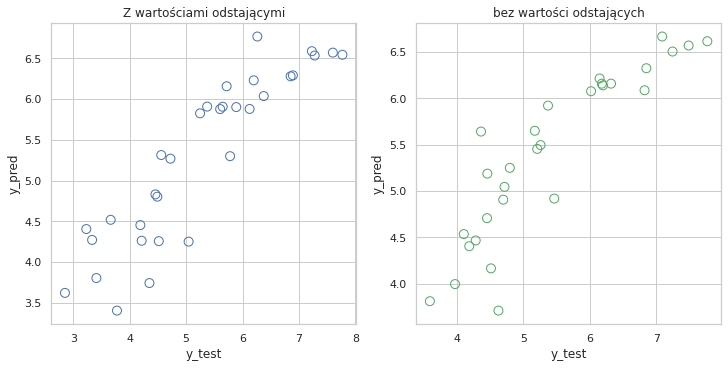

In [19]:
# Jak poszło przewidywanie danych
fig, ax = plt.subplots(1, 2, figsize=(10,5), constrained_layout=True)

y_list = [
          { 'b' : [  y_test      , y_pred_test        ]  },
          { 'g' : [  y_iqr_test  , y_pred_iqr_sc_test ]  }
        ]

labels_dict = [
                {'Z wartościami odstającymi' : [  'y_test' , 'y_pred' ] },
                {'bez wartości odstających'  : [  'y_test'  , 'y_pred'  ] }                 
              ]
index = 0
for col in range(2):
    yTestAndPred = [val for val in y_list[index].values() ][0] 
    color = [key for key in y_list[index].keys() ] 

    xyLabels = [val for val in labels_dict[index].values() ][0]
    title = [key for key in labels_dict[index].keys() ] 

    ax[col].scatter(yTestAndPred[0], yTestAndPred[1], s=80, facecolors='none', edgecolors= color)
    ax[col].set_xlabel(xyLabels[0])
    ax[col].set_ylabel(xyLabels[1])
    ax[col].set_title(title[0])
    index+=1   

plt.show()

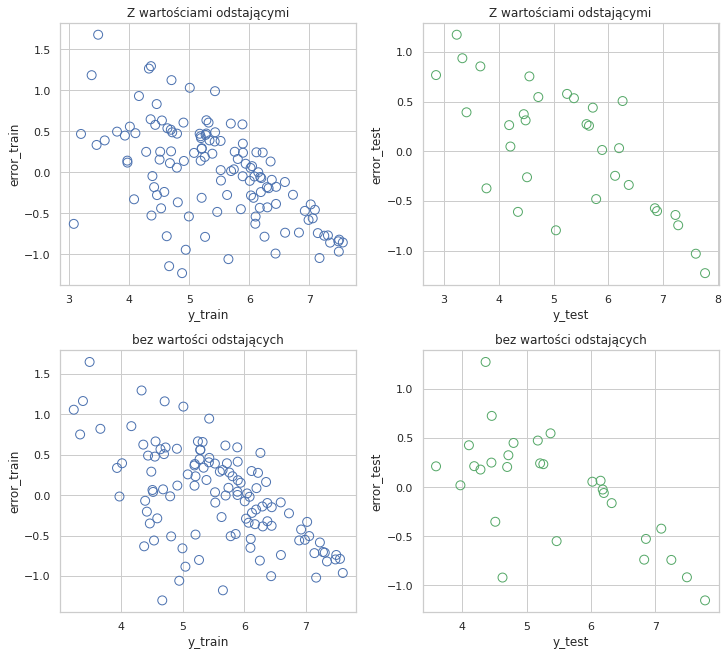

In [20]:
# Wykresy wartości resztowych:
fig, ax = plt.subplots(2, 2, figsize=(10,9), constrained_layout=True)

error_train = y_pred_train - y_train
error_test =  y_pred_test - y_test

error_iqr_train = y_pred_iqr_sc_train - y_iqr_train
error_iqr_test =  y_pred_iqr_sc_test - y_iqr_test

y_list = [
          { 'b' : [  y_train     , error_train     ]  },
          { 'g' : [  y_test      , error_test      ]  },
          { 'b' : [  y_iqr_train , error_iqr_train ]  },
          { 'g' : [  y_iqr_test  , error_iqr_test  ]  }
        ]

labels_dict = [
                {'Z wartościami odstającymi' : [  'y_train' , 'error_train' ] },
                {'Z wartościami odstającymi' : [  'y_test'  , 'error_test'  ] },              
                {'bez wartości odstających'  : [  'y_train' , 'error_train' ] },
                {'bez wartości odstających'  : [  'y_test'  , 'error_test'  ] }                 
              ]

index = 0
for row in range(2):
  for col in range(2):
    yAndError= [val for val in y_list[index].values() ][0] 
    color = [key for key in y_list[index].keys() ] 

    xyLabels = [val for val in labels_dict[index].values() ][0]
    title = [key for key in labels_dict[index].keys() ] 

    ax[row,col].scatter(yAndError[0], yAndError[1], s=80, facecolors='none', edgecolors= color)
    ax[row,col].set_xlabel(xyLabels[0])
    ax[row,col].set_ylabel(xyLabels[1])
    ax[row,col].set_title(title[0])
    index+=1   

plt.show()

In [21]:
print('Wartości wag:    {}'.format(lr.coef_))
print('Wartość stała w0: {}'.format(lr.intercept_))

w1 = round(lr.coef_[0][0], 3)
w2 = round(lr.coef_[0][1], 3)
w3 = round(lr.coef_[0][2], 3)

w0 = round(lr.intercept_[0], 3)

print()
print('Równanie funkcji wielomianowej: y = {} + {}x + {}x\u00b2 + {}x\u00b3'.format(w0, w1, w2, w3))


# Ile było dobrych w porównianiu do wszystkich wyników:
# Metoda score oblicza przewidywane wartości w oparciu o X_test, a następnie porównać je z y_test
print('SCORE: {}%'.format(SCORE))
print('SCORE (bez wartości odstających): {}%'.format(SCORE_IQR))
print()
print()
print('Z wartościami odstającymi: R2 (Train): {}%    R2 (Test): {}%'.format(R2_train, R2_test))
print()
print('Bez wartości odstających: R2 (Train): {}%    R2 (Test): {}%'.format(R2_IQR_train, R2_IQR_test))

Wartości wag:    [[0.27325154 0.36677318 0.33796482]]
Wartość stała w0: [5.41444366]

Równanie funkcji wielomianowej: y = 5.414 + 0.273x + 0.367x² + 0.338x³
SCORE: 79.21%
SCORE (bez wartości odstających): 76.01%


Z wartościami odstającymi: R2 (Train): 69.33%    R2 (Test): 79.21%

Bez wartości odstających: R2 (Train): 66.16%    R2 (Test): 77.93%
